# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data = "../Output Data File/output_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create empty df to store data for each city as for loop pulls queries

city_wx = pd.DataFrame({"City":cities})
city_wx["Lat"]= ""
city_wx["Lng"]= ""
city_wx["Max Temp"] = ""
city_wx["Humidity"]= ""
city_wx['Cloudiness'] = ""
city_wx["Wind Speed"]= ""
city_wx["Country"] = ""
city_wx["Date"] = ""

In [13]:
#creating parameters for API call
key = "&appid=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?q="

print("Beginning Data Retrieval")
sets = 1
number = 1


for index,row in city_wx.iterrows():
    query = f'http://api.openweathermap.org/data/2.5/weather?q={row["City"]}&units=imperial{key}'
    try:
        weather_response = requests.get(query).json()
        print(f'Processing Record {number} of {sets} | {row["City"]}')

        city_wx.loc[index,"Lat"] = weather_response['coord']['lat']
        city_wx.loc[index,"Lng"] = weather_response['coord']['lon']
        city_wx.loc[index,"Max Temp"] = weather_response['main']['temp_max']
        city_wx.loc[index,"Humidity"] = weather_response['main']['humidity']
        city_wx.loc[index,'Cloudiness'] = weather_response['clouds']['all']
        city_wx.loc[index,"Wind Speed"] = weather_response['wind']['speed']
        city_wx.loc[index,"Country"] = weather_response['sys']['country']
        city_wx.loc[index,"Date"] = weather_response['dt']
    
    except:
        print("City not found. Skipping...")
    
    number += 1
    if number == 51:
          sets += 1
          number = 1

Beginning Data Retrieval
Processing Record 1 of 1 | praia da vitoria
Processing Record 2 of 1 | samusu
City not found. Skipping...
Processing Record 3 of 1 | albany
Processing Record 4 of 1 | avarua
Processing Record 5 of 1 | hami
Processing Record 6 of 1 | mataura
Processing Record 7 of 1 | barbar
City not found. Skipping...
Processing Record 8 of 1 | ust-nera
Processing Record 9 of 1 | ushuaia
Processing Record 10 of 1 | tiksi
Processing Record 11 of 1 | belushya guba
City not found. Skipping...
Processing Record 12 of 1 | ginir
Processing Record 13 of 1 | bredasdorp
Processing Record 14 of 1 | roscommon
Processing Record 15 of 1 | karasuk
Processing Record 16 of 1 | sharjah
Processing Record 17 of 1 | arraial do cabo
Processing Record 18 of 1 | lebu
Processing Record 19 of 1 | punta arenas
Processing Record 20 of 1 | bouafle
Processing Record 21 of 1 | hobart
Processing Record 22 of 1 | cayenne
Processing Record 23 of 1 | abatskoye
Processing Record 24 of 1 | touros
Processing Recor

Processing Record 10 of 5 | kiruna
Processing Record 11 of 5 | ahome
Processing Record 12 of 5 | shimoda
Processing Record 13 of 5 | san quintin
Processing Record 14 of 5 | manono
Processing Record 15 of 5 | umm jarr
City not found. Skipping...
Processing Record 16 of 5 | kailua
Processing Record 17 of 5 | iqaluit
Processing Record 18 of 5 | yatou
Processing Record 19 of 5 | simi
Processing Record 20 of 5 | mgandu
Processing Record 21 of 5 | udachnyy
Processing Record 22 of 5 | suntar
Processing Record 23 of 5 | bethel
Processing Record 24 of 5 | kant
Processing Record 25 of 5 | namatanai
Processing Record 26 of 5 | zhuhai
Processing Record 27 of 5 | richards bay
Processing Record 28 of 5 | stokmarknes
Processing Record 29 of 5 | sawtell
Processing Record 30 of 5 | aksu
Processing Record 31 of 5 | aku
Processing Record 32 of 5 | abu kamal
Processing Record 33 of 5 | barcelos
Processing Record 34 of 5 | oistins
Processing Record 35 of 5 | fortuna
Processing Record 36 of 5 | aklavik
Proc

Processing Record 17 of 9 | sao joao da barra
Processing Record 18 of 9 | marrakesh
Processing Record 19 of 9 | laramie
Processing Record 20 of 9 | coquimbo
Processing Record 21 of 9 | ksenyevka
City not found. Skipping...
Processing Record 22 of 9 | akureyri
Processing Record 23 of 9 | aktash
Processing Record 24 of 9 | dabhol
Processing Record 25 of 9 | san pedro del pinatar
Processing Record 26 of 9 | saint-augustin
Processing Record 27 of 9 | yaan
Processing Record 28 of 9 | haines junction
Processing Record 29 of 9 | kpandu
Processing Record 30 of 9 | hamilton
Processing Record 31 of 9 | malinyi
Processing Record 32 of 9 | gawler
Processing Record 33 of 9 | cascais
Processing Record 34 of 9 | jiayuguan
Processing Record 35 of 9 | maniitsoq
Processing Record 36 of 9 | tilichiki
Processing Record 37 of 9 | sayat
Processing Record 38 of 9 | bairnsdale
Processing Record 39 of 9 | nuuk
Processing Record 40 of 9 | aripuana
Processing Record 41 of 9 | nakhon phanom
Processing Record 42 o

In [14]:
city_wx

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,praia da vitoria,38.7333,-27.0667,62.01,94,40,12.73,PT,1615084287
1,samusu,-33.65,115.333,73,76,13,1.99,AU,1615084248
2,albany,42.6001,-73.9662,23,55,3,1.01,US,1615084201
3,avarua,-21.2078,-159.775,78.8,94,75,14.97,CK,1615084339
4,hami,42.8,93.45,43.74,53,0,5.91,CN,1615084339
...,...,...,...,...,...,...,...,...,...
604,cumanayagua,22.1494,-80.2022,75.2,73,18,5.75,CU,1615084440
605,zaltan,32.947,11.8665,58.1,93,100,6.85,LY,1615084440
606,tazmalt,36.3868,4.3989,54.9,66,78,4.63,DZ,1615084440
607,galgani,-33.65,115.333,73,76,13,1.99,AU,1615084248


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
city_wx.to_csv(output_data)

In [21]:
city_wx.describe()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
count,609,609.00,609.0000,609.0,609,609,609.00,609,609
unique,609,553.00,557.0000,362.0,79,84,274.00,116,172
top,sinnamary,-33.65,115.3333,73.0,76,0,1.99,AU,1615084248
freq,1,53.00,53.0000,55.0,67,100,58.00,75,54


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
humidity_gtr_100 = city_wx.loc[city_wx["Humidity"] > 100]
humidity_gtr_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [27]:

city_wx.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,praia da vitoria,38.7333,-27.0667,62.01,94,40,12.73,PT,1615084287
1,samusu,-33.65,115.333,73,76,13,1.99,AU,1615084248
2,albany,42.6001,-73.9662,23,55,3,1.01,US,1615084201
3,avarua,-21.2078,-159.775,78.8,94,75,14.97,CK,1615084339
4,hami,42.8,93.45,43.74,53,0,5.91,CN,1615084339


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [7]:
city_wx = pd.read_csv(output_data)
city_wx.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,praia da vitoria,38.7333,-27.0667,62.01,94,40,12.73,PT,1615084287
1,1,samusu,-33.6500,115.3333,73.00,76,13,1.99,AU,1615084248
2,2,albany,42.6001,-73.9662,23.00,55,3,1.01,US,1615084201
3,3,avarua,-21.2078,-159.7750,78.80,94,75,14.97,CK,1615084339
4,4,hami,42.8000,93.4500,43.74,53,0,5.91,CN,1615084339


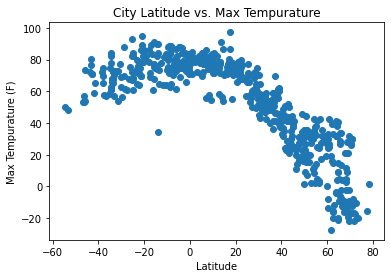

In [6]:
x_axis_lt = city_wx["Lat"]
y_axis_lt = city_wx["Max Temp"]
plt.scatter(x_axis_lt, y_axis_lt)
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature (F)")
plt.title("City Latitude vs. Max Tempurature");

## Latitude vs. Humidity Plot

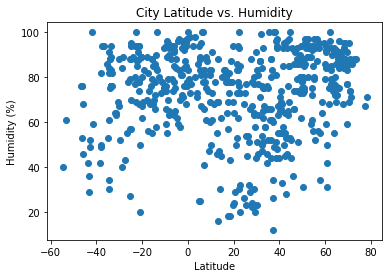

In [9]:
x_axis_lh = city_wx["Lat"]
y_axis_lh = city_wx["Humidity"]
plt.scatter(x_axis_lh, y_axis_lh)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity");

## Latitude vs. Cloudiness Plot

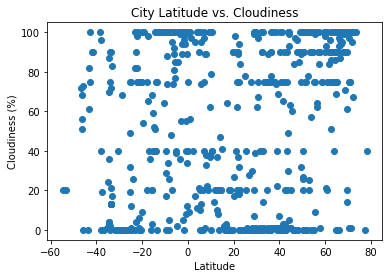

In [10]:
x_axis_lc = city_wx["Lat"]
y_axis_lc = city_wx["Cloudiness"]
plt.scatter(x_axis_lc, y_axis_lc)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness");

## Latitude vs. Wind Speed Plot

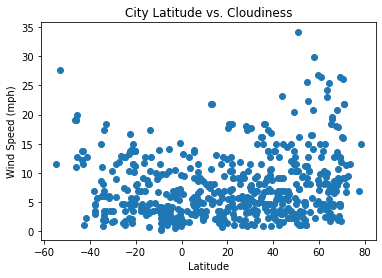

In [11]:
x_axis_lws = city_wx["Lat"]
y_axis_lws = city_wx["Wind Speed"]
plt.scatter(x_axis_lws, y_axis_lws)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Cloudiness");

## Linear Regression

In [14]:
#seperates data frame into norhtern and southern hemispheres
northern_city_wx = city_wx[city_wx["Lat"]>=0]
southern_city_wx = city_wx[city_wx["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.8036372639335722


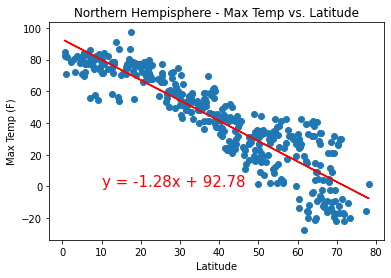

In [19]:
north_lats = northern_city_wx["Lat"]
north_temps = northern_city_wx["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lats, north_temps)

regress_values = north_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_lats, north_temps)
plt.plot(north_lats, regress_values, "r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
print(f"The r-squared value is: {rvalue**2}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hempisphere - Max Temp vs. Latitude")
plt.savefig("../Output Data File/Norther Hemisphere Max Temps.png")

The r-value is: 0.46937863826630627


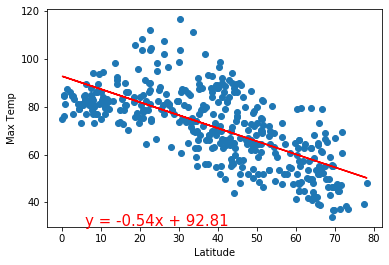

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


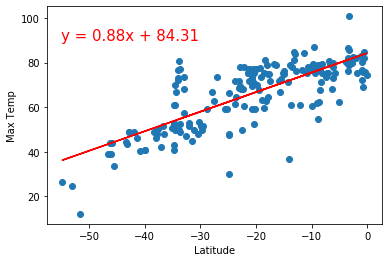

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


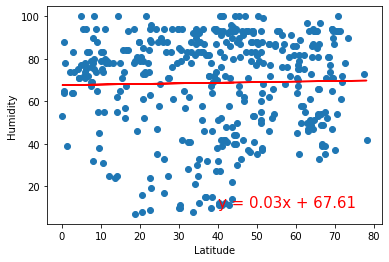

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


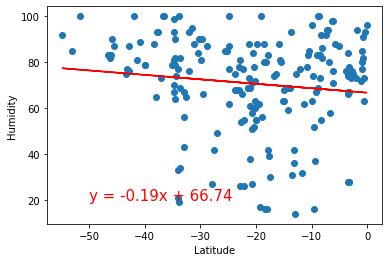

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


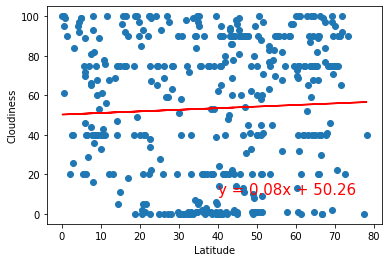

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


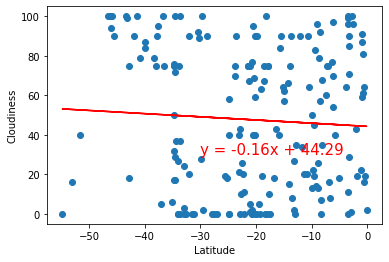

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


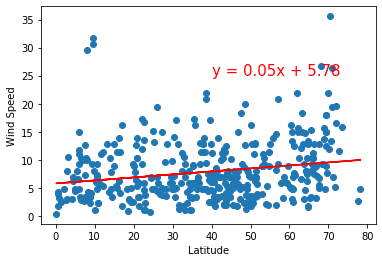

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


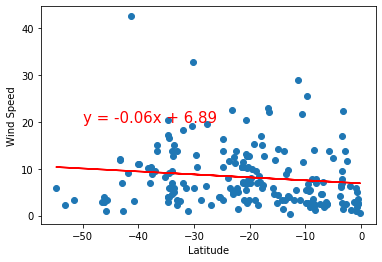